In [4]:

# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

# Tắt cảnh báo
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Đặt seed cho random để kết quả tái lặp được
np.random.seed(42)

# Tải dữ liệu
data = pd.read_csv('cereal.csv')

# Hiển thị số lượng điểm dữ liệu
print("Number of datapoints:", len(data))

# Xử lý giá trị bị thiếu bằng cách điền giá trị trung bình
#data = data.fillna(data.mean())

# Xóa cột không cần thiết
data.drop(['mfr'], axis=1, inplace=True)

#data.drop(['name'], axis=1, inplace=True)

# Sử dụng LabelEncoder để mã hóa cột phân loại thành số
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

label_encoder = LabelEncoder()
data['name'] = label_encoder.fit_transform(data['name'])

# Xem các dòng đầu tiên của dữ liệu
data.head(25)



Number of datapoints: 77


,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,3,0,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,4,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,5,0,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,6,0,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,7,0,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,8,0,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,9,0,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


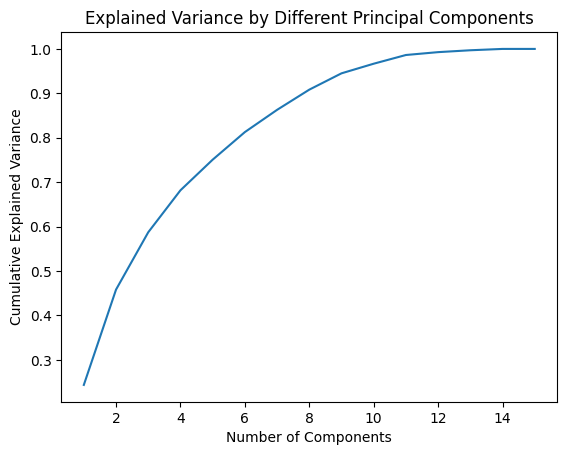

In [5]:
# Bước 2: Chia tỷ lệ
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Bước 3
# Điều chỉnh PCA trên dữ liệu được chia tỷ lệ
pca = PCA().fit(scaled_features)

# Vẽ biểu đồ tổng tích lũy của phương sai được giải thích 
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()



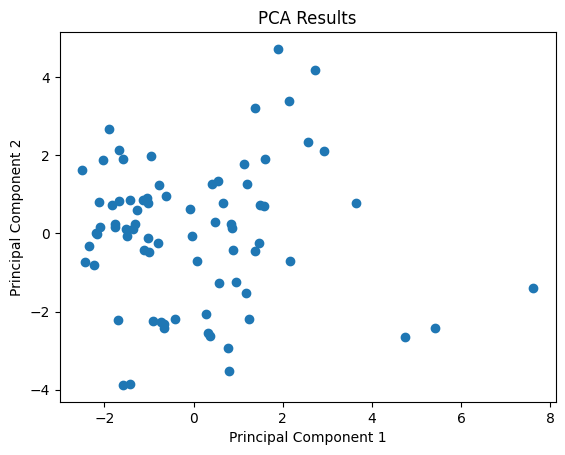

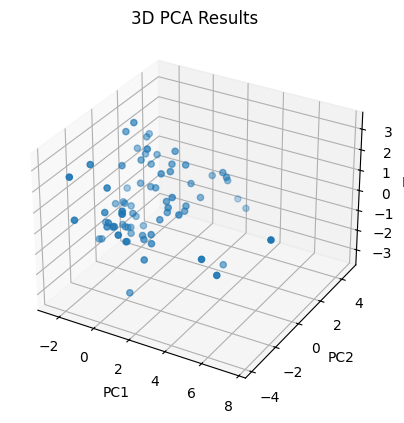

In [30]:
# Thiết lập số thành phần trong PCA
n_components = 3
pca = PCA(n_components=n_components)

#Bước 4: Áp dụng PCA - Chuyển đổi dữ liệu
# Áp dụng PCA với số lượng thành phần tối ưu 
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_features)

# Pca_result là một mảng có các tính năng được chuyển đổi

# Biểu đồ 2D (if n_comComponents=2) 
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

# Biểu đồ 3D
if n_components == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('3D PCA Results')
    plt.show()

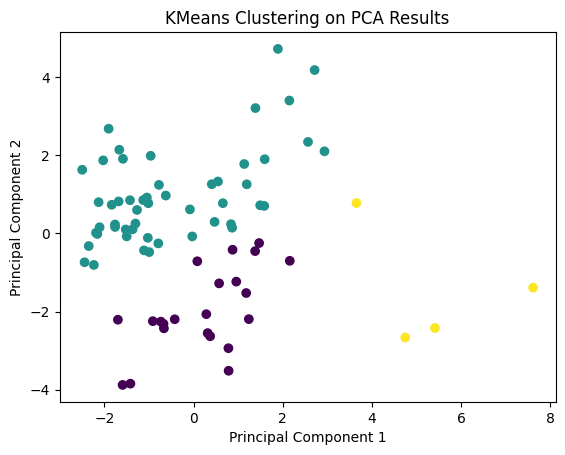

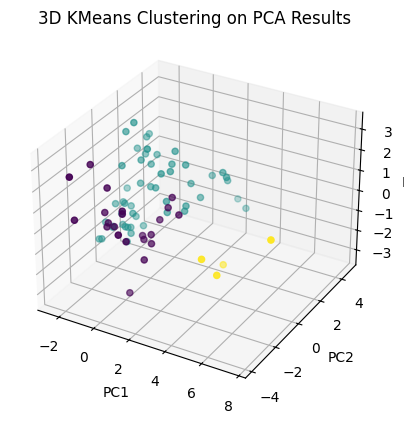

In [31]:
# Bước 5: Phân cụm Kmeans

# Xác định số lượng cụm 
# (Con số này có thể được xác định dựa trên kiến ​​thức miền, chẩn đoán hoặc các phương pháp như Phương pháp khuỷu tay) 
n_clusters = 3

# Áp dụng phân cụm KMeans 
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42) 
kmeans_pca.fit(pca_result) 

# Nhãn cụm cho mỗi điểm dữ liệu 
cluster_labels = kmeans_pca.labels_

# Trực quan hóa 2D 
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on PCA Results')
plt.show()

# Trực quan hóa 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D KMeans Clustering on PCA Results')
plt.show()



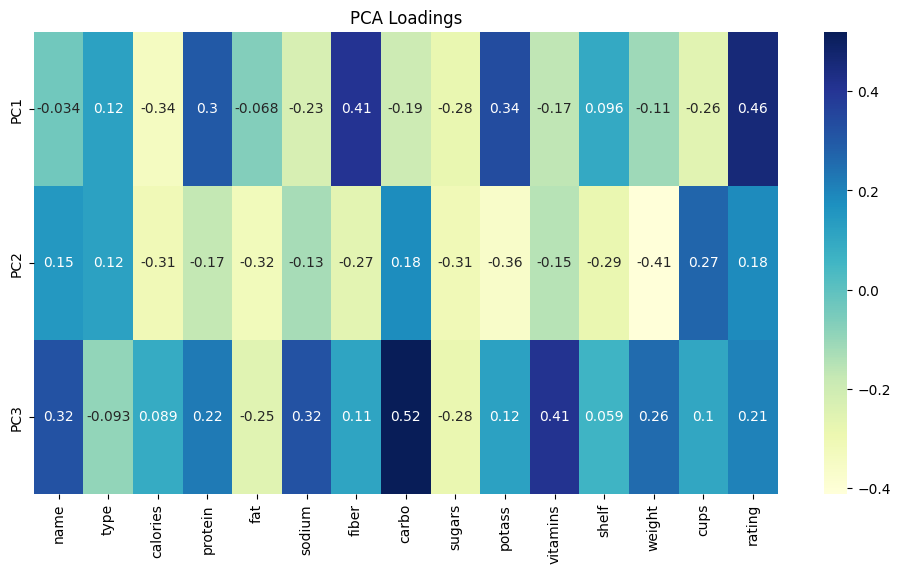

In [32]:
# Bước 6

# Lấy các thành phần PCA (loadings)
pca_components = pca.components_

# Tạo DataFrame để hiển thị và phân tích một cách rõ ràng hơn
pca_loadings_df = pd.DataFrame(pca_components, columns=data.columns, index=[f'PC{i+1}' for i in range(pca.n_components)])

# Hiển thị the loadings
pca_loadings_df

# Heatmap of the loadings
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

In [33]:
# Bước 7

# Biến đổi ngược các trung tâm cụm 
original_space_centroids = scaler.inverse_transform(pca.inverse_transform(kmeans_pca.cluster_centers_)) 

# Tạo một DataFrame cho các trung tâm cụm được chuyển đổi ngược 
centroids_df = pd.DataFrame(original_space_centroids, columns=data.columns) 

# Hiển thị các trung tâm 
centroids_df

# Tính giá trị trung bình của dữ liệu gốc 
original_means = data.mean(axis=0) 

# Thêm giá trị trung bình vào các centroid để so sánh 
centroids_comparison_df = pd.concat([centroids_df, original_means.to_frame().T], ignore_index=True)

# Hiển thị so sánh
centroids_comparison_df

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,32.317791,-0.006274,117.891300,3.020435,1.611057,180.857041,3.631791,13.224837,9.258849,153.228583,35.498201,2.702484,1.154440,0.688479,39.191113
1,41.496887,0.050284,104.327958,2.194782,0.734395,158.709419,1.051704,15.734398,6.219025,58.999706,26.747157,1.937204,0.977866,0.911229,41.911127
2,24.666841,0.143380,78.916384,4.404137,1.275645,55.491186,8.040927,7.649820,3.033756,254.496541,7.483637,2.936989,1.002785,0.400201,71.396828
3,38.000000,0.038961,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705


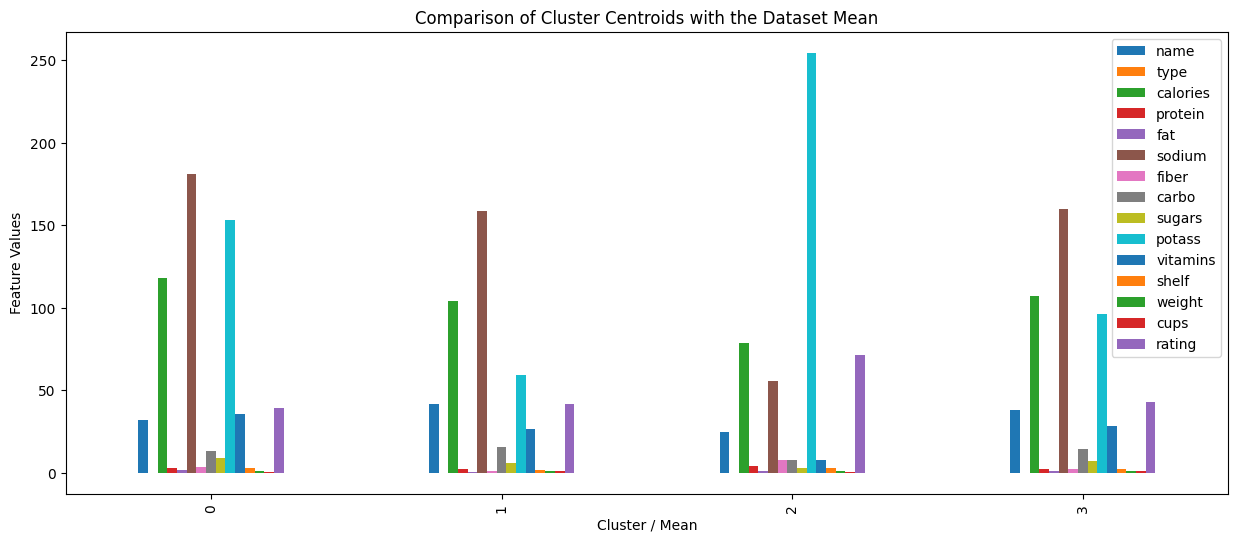

In [34]:
# Bước 8

# Trực quan hoá
centroids_comparison_df.plot(kind='bar', figsize=(15, 6))
plt.title('Comparison of Cluster Centroids with the Dataset Mean')
plt.xlabel('Cluster / Mean')
plt.ylabel('Feature Values')
plt.show()

In [35]:
# Bước 9

# Trích xuất các giá trị tuyệt đối của  loadings
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca.components_), 
    columns=data.columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components)]
)

# Xác định các tính năng đóng góp hàng đầu cho từng thành phần chính
top_features_per_pc = pca_loadings_analysis.apply(lambda s: s.nlargest(5).index.tolist(), axis=1)

top_features_per_pc

PC1    [rating, fiber, calories, potass, protein]
PC2       [weight, potass, fat, sugars, calories]
PC3       [carbo, vitamins, sodium, name, sugars]
dtype: object

In [36]:
# Function to get top features and their loadings
def get_top_features_loadings(pca_loadings, n_features):
    top_features = {}
    for i in range(pca_loadings.shape[0]):
        top_indices = np.argsort(np.abs(pca_loadings[i]))[-n_features:]
        top_features[f'PC{i+1}'] = {data.columns[j]: pca_loadings[i][j] for j in top_indices}
    return top_features

# Get and display the top features and their loadings
top_features_loadings = get_top_features_loadings(pca.components_, 5)
top_features_loadings_df = pd.DataFrame(top_features_loadings).T

top_features_loadings_df

,protein,potass,calories,fiber,rating,sugars,fat,weight,name,sodium,vitamins,carbo
PC1,0.29978,0.335648,-0.342062,0.407166,0.458202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC2,NaN,-0.362760,-0.313061,NaN,NaN,-0.313430,-0.324342,-0.41198,NaN,NaN,NaN,NaN
PC3,NaN,NaN,NaN,NaN,NaN,-0.284623,NaN,NaN,0.31765,0.319737,0.407447,0.520178
